In [5]:
import os,sys
sys.path.append('./../../../open_AR_Sandbox/')
sys.path.append('./../../../gempy-1.16/')
import sandbox.sandbox as sb
import matplotlib.pyplot as plt 
import numpy as np
import pandas as p
import pykinect2

In [6]:
calib = sb.CalibrationData(file='my_calibration.json')

JSON configuration loaded.


In [7]:
kinect = sb.KinectV2(calib)

KinectV2 initialized.


In [8]:
marker = sb.ArucoMarkers(kinect)

In [9]:
marker.find_markers_ir(kinect,4)

,Corners_IR_y,Corners_IR_x
ids,,
5,390,95
11,116,99
1,391,436
2,119,435


In [10]:
marker.find_markers_rgb(kinect,4)

,Corners_RGB_x,Corners_RGB_y
ids,,
5,538,1038
1,1538,1033
2,1514,234
11,544,237


In [11]:
df=marker.update_dict_markers_current()

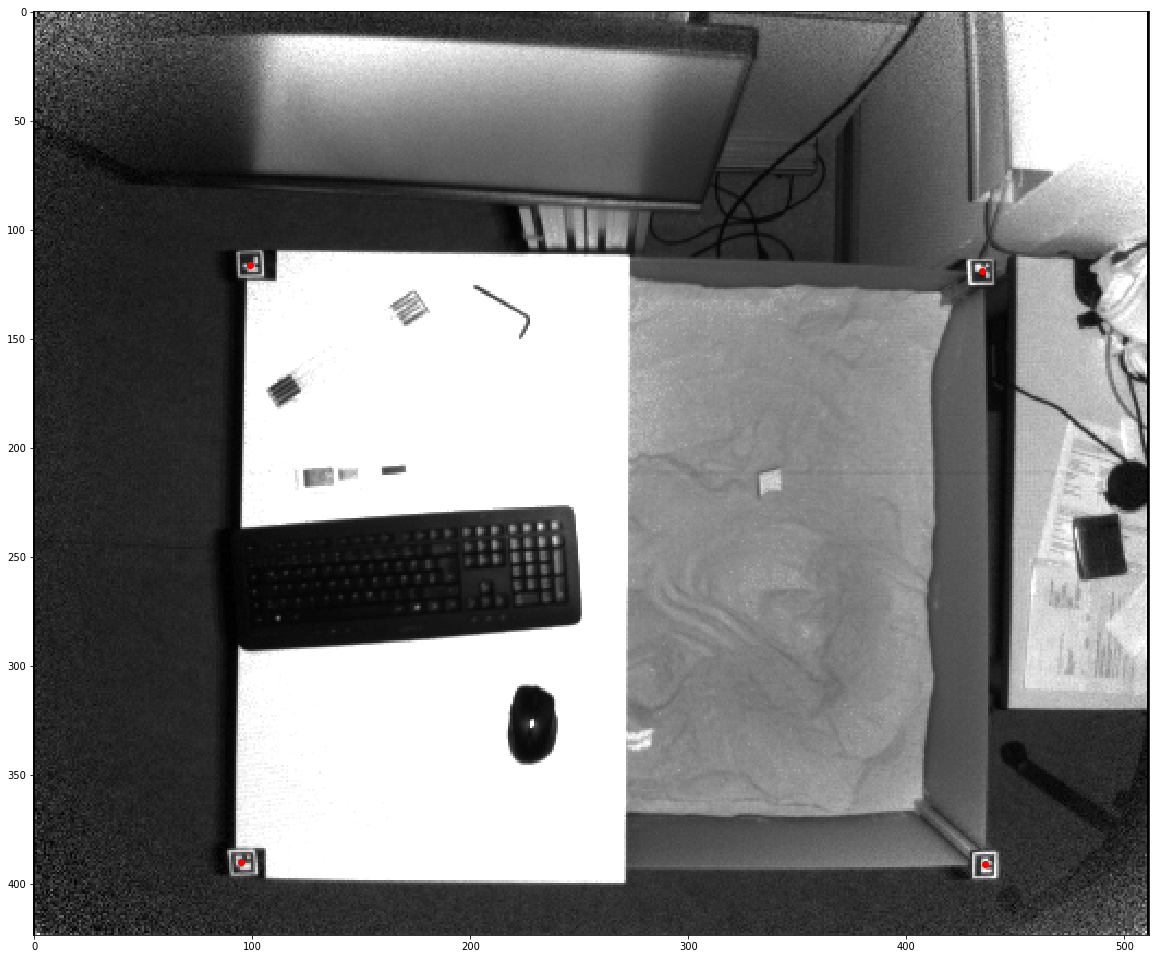

In [12]:
marker.plot_ir_aruco_location(kinect)

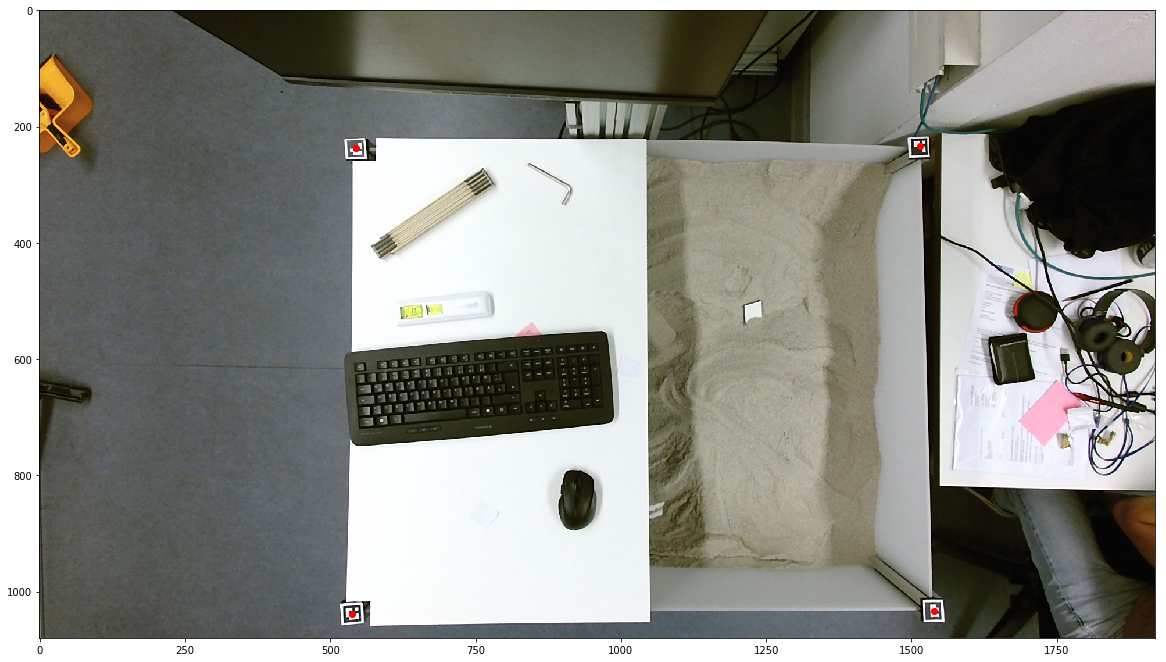

In [13]:
marker.plot_rgb_aruco_location(kinect)

In [ ]:
val= marker.update_dict_markers_current()
val

In [ ]:
to_x = int(sum(val["Corners_IR_x"])/4)
to_y = int(sum(val["Corners_IR_y"])/4)

In [ ]:
depthPoint = pykinect2.PyKinectV2._DepthSpacePoint(to_x,to_y)
depth = kinect.get_frame()[to_x][to_y]
ColorSpacePoint = kinect.device._mapper.MapDepthPointToColorSpace(depthPoint = depthPoint, depth = depth)
est_x=int(ColorSpacePoint.x)
est_y= int(ColorSpacePoint.y)

In [ ]:
values = pd.DataFrame({"Corners_IR_x": [est_x], "Corners_IR_y": [est_y]})
values

In [ ]:
df = pd.DataFrame.append(val, values, sort=False)
df

In [ ]:
df_temp = pd.DataFrame({"ids":[0],"Corners_IR_x": [to_x], "Corners_IR_y": [to_y], 
                        "Corners_RGB_x": [est_x], "Corners_RGB_y": [est_y]})
theoretical=df_temp.set_index("ids")
val = pd.concat([val, theoretical], sort=False)
final = val.set_index("ids")
final

In [ ]:
val

In [14]:
marker.middle_point(autocalib=1)

1026.7022705078125


,Middle_IR_x,Middle_IR_y,Middle_RGB_x,Middle_RGB_y
0,266,254,1026,694
